In [ ]:
import numpy as np
from scipy.integrate import odeint,simps
import numpy.ma as ma
import matplotlib.pyplot as plt

In [ ]:
#create grid
Ndim=np.arange(-4,4+0.01,0.01)
X,Y=np.meshgrid(Ndim,Ndim,indexing='ij')
# np.delete(X,400,1)
# np.delete(X,399,1)
# np.delete(X,401,1)
# np.delete(Y,400,1)
# np.delete(Y,399,1)
# np.delete(Y,401,1)


In [ ]:
def F(X,Y,m):
    a=(1+m)
    Z=(X)+Y*1j
    # Z=ma.masked_where(np.absolute(Z-m)<=a, Z)
    Z+=m
    res=Z+a**2/Z
    return res.real,res.imag,res
def Jokowski(z):
    # _,_,z=F(X,Y,m)
    res=z+1/z
    # res=0.5*(z+np.sqrt(z-2)*np.sqrt(z+2))
    return res.real,res.imag,res

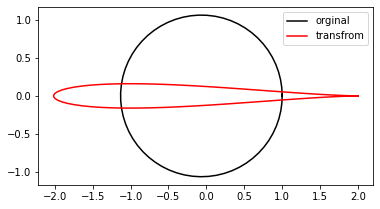

In [113]:
theta = np.arange(0, 2*np.pi+0.1, 0.1)
m=0.06577949225902557



z = (1+m)*np.exp(1j*theta)-m

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
axs.plot(np.real(z), np.imag(z),c="k",label="orginal")
axs.set_aspect(1)
xi = z + 1.0 / z

axs.plot(np.real(xi), np.imag(xi),c="r",label="transfrom")
axs.set_aspect(1)
plt.legend()
plt.savefig("../images/8p_P1.png",dpi=125, bbox_inches='tight')



In [108]:
def jc(m):
    theta = np.arange(0, 2*np.pi+0.1, 0.1)
    z = (1+m)*np.exp(1j*theta)-m
    xi = z + 1.0 / z
    res=(xi.imag.max()*2)/((xi.real.max()-xi.real.min()))
    return res-t

In [109]:
def my_bisection(f, a, b,aa=0, tol=1e-8): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

In [104]:

for t in [8/100,4/100,2/100]:
    print(my_bisection(jc, 0, 1,aa=0, tol=1e-8))

0.1020456999540329
0.06577916443347931
0.031784847378730774
0.015633851289749146


In [110]:
for t in [8/100,4/100,2/100]:
    print(my_bisection(jc, 0, 1,aa=0, tol=1e-8))

0.06577949225902557
0.0317976176738739
0.0156366229057312


In [ ]:
(xi.imag.max()-xi.imag.min())/((xi.real.max()-xi.real.min()))

In [ ]:
(xi.imag.max()-xi.imag.min())